# Health Analysis of OSS Using Datum from Twitter Community

## Motivation

I wanted to analyze how people approach themes related to OSS and understand their feelings around it, so I've decided to gather data of people talking about OSS on Twitter and run a sentiment analysis tool to learn what kind of information I can extract from the datum and sort it as positive, negative or neutral. 
I believe that this kind of analysis is important to keep track on the community, it helps to understand more about how healthy is the environment we are, what's wrong with it, what's right and how we can improve it.

## Tools

I wanted to see people interacting about OSS and I imagined it'd be interesting to use Twitter data to make my analysis, Twitter is a social network widely used by people who are interested in the OSS cummunity and therefore there are lots of data to be used.

### Twitter API

I've used the [Twitter API](https://developer.twitter.com/en/docs) to extract data from Twitter I've also used [agalea91](https://github.com/agalea91/twitter_search)'s `twitter_streaming.py` code with a few minor changes and updates to match the new version of Twitter API and to get the kind of data I was after.

### VADER

To make the sentiment analyses I chose the [VADER](https://github.com/cjhutto/vaderSentiment#introduction) tool because it was primarily developed to analyse microblogging and social media sites, especially Twitter. 

VADER uses [nltk](http://www.nltk.org/_modules/nltk/sentiment/vader.html) Python library and it sorts the results on positive, negative or neutral. It also offers a compound polarity score which is a normalization of the sentiments that VADER identifies on the data, it's functioning is better explained [here](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk).

### Python

All the code is written in Python 3. The reason why I chose Python is because it's a language that have an enormous community that creates awesome tools for it. I needed to run a sentiment analyses, deal with big json files and create graphs with the results and Python was the only language I found that offered me great quality tools for everything I needed. 

## Datum

I've gathered datum from users all around the world that used Twitter filtering their messages using the following key-words:

* Open Source Software         
* open source software          
* मुक्त स्रोत सॉफ्टवेयर
* 开源软件                        
* オープンソースソフトウェア
* 오픈 소스 소프트웨어
* برمجيات مفتوحة المصدر
* software de código abierto
* Software de código aberto
* software de código aberto
* offene Quelle       
* Открытое программное обеспечение

Unfortunately, my access to the Twitter API was very limited and I was only able to gather 8 days of datum, from 03/12/2018 to 03/20/2018. 
That the datum, even not big, is enough to have a general idea about the health of the OSS communities around the world.

I've chosen to make an analysis based on the timezone that was setted in the person's twitter account because there was very few datum about the country or city where the person was. 

I've also made an analyses based on the language spoken by the users to see if there was any interesting connection between the idiom and the health of the OSS community around it.

There was considerable less data from all the other languages like Portuguse or German than from English languages which decrease the quality of my analysis upon these datum, also, even though VADER is the best OSS tool I've founded on the web it doesn't offer a great support for languages other than English and that might have affected the results on other idioms also decreasing analysis's quality.

I've included other languages on the analyses because I wanted to be as horizontal as possible not imposing English as the only mandatory and relevant language when analyzing OSS communities.

## Results

### Relation of Users Discussing About OSS by Timezone

First I wanted to analyze how many people were talking about OSS around the world and I used the following code to help do that:

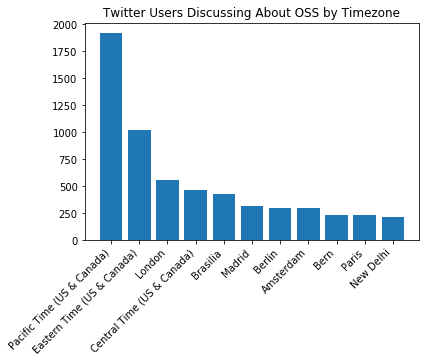

In [13]:
import collections
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

with open('data/total_data.py') as datafile:
    data = json.load(datafile)
    
for i in range (len(data)):
    data[i] = flatten(data[i])

dataframe = pd.DataFrame(data)

user_time_zone = dataframe['user_time_zone']
number_user_time_zone = Counter(user_time_zone)
del number_user_time_zone[None]
number_user_time_zone = number_user_time_zone.most_common(11)
 
Time_Zone = list(zip(*number_user_time_zone))[0]
Population = list(zip(*number_user_time_zone))[1]
x_pos = np.arange(len(Time_Zone))

plt.title('Twitter Users Discussing About OSS by Timezone')
plt.bar(x_pos, Population, align='center')
plt.xticks(x_pos, Time_Zone, rotation=45, ha='right')
plt.show()

What the code above is doing is receiving a json file that contains all the datum that was used in this project and transforming it to a format that Pandas can understand and create a DataFrame from it. The number of times each timezone appears in the datum is counted, then the datum can be extracted and translated in the table you're seeing.

As it was expected there are many users that are from US and Canada and most of general users are from the East Coast, home of many technology companies. 
But there are also some unexpected, as a Brazilian I was surprised to learn that a considerable part of users who were talking about OSS were doing so from Brasília timezone. Germany seems like it has a low user count, but in reality it shows up twice with Berlin and Bern's timezones, so there is a relevent representativeness from these timezones.
I was also surprised to see such a low presence on India and China's timezones, even though they're relevant contributors to the OSS community, which makes me conclude that either the users from these timezones don't user Twitter a lot or that most of them chose not to share their timezones with Twitter.


### Sentiment Analysis of Twitter Users Discussing About OSS by Timezone

To understand more deeply these communities I've analyzed how positive, negative or neutral was the language they were using to talk about OSS:

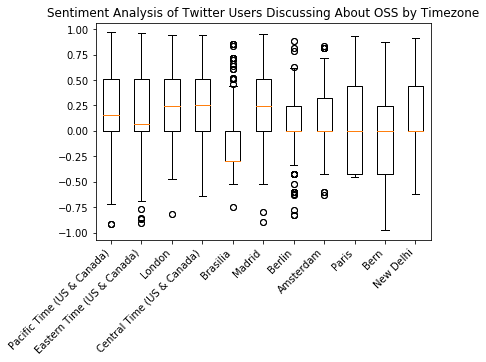

In [12]:
import collections
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import twython
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

with open('data/total_data.py') as datafile:
    data = json.load(datafile)
    
for i in range(len(data)):
    data[i] = flatten(data[i])

dataframe = pd.DataFrame(data)

time_zone_full_text = dataframe.loc[:, ['user_time_zone', 'full_text']]
time_zone_full_text = time_zone_full_text.mask(time_zone_full_text.eq('None')).dropna()

time_zone_full_text = time_zone_full_text.groupby('user_time_zone')
time_zone_counter = time_zone_full_text.count().sort_values(by='full_text', ascending=False)
time_zone_counter = time_zone_counter[:11]

sia = SentimentIntensityAnalyzer()

dict_sorted_time_zone_full_text = {}

for i in time_zone_counter.index:
    sorted_time_zone_full_text = time_zone_full_text.get_group(i)

    scores = []

    for j in sorted_time_zone_full_text.values:
        scores.append(sia.polarity_scores(j[1])['compound'])

    dict_sorted_time_zone_full_text[i] = scores

plt.title('Sentiment Analysis of Twitter Users Discussing About OSS by Timezone')    
plt.boxplot(dict_sorted_time_zone_full_text.values(), labels=dict_sorted_time_zone_full_text.keys())
plt.xticks(range(1, 12), dict_sorted_time_zone_full_text.keys(), rotation=45, ha='right')
plt.show()
 

This code does the same that the one before it. I've used Pandas to treat the datum and I chose the timezones that returned more responses in my previous test to run the sentiment analysis using VADER tool.

By observing the box plot we can see that all of the US and Canada have a more positive result, with the Pacific Time having a score of about 0.125, the Eastern Time 0.065 and Central Time with the highest rate of 0.250 in a 1.00 scale. London also had a positive result with an average score of 0.250. Brasília had the lowest score and a big variation of data. Madri also did great on the sentiment analyses with an average of 0.250. Amsterdam had a lot of data variation and had a neutral score. Paris also had a neutral score and well distributed data, which means that there are more or less the same number of people talking positive and negative things about OSS. Bern had a neutral average score, but there are more people talking negative things about OSS than there are talking positive thing, even though the negative things aren't so bad. New Delhi kept a positive rate but had a neutral score. (!!! wt)

Even though Brasilia, Paris and Bern have shown some negative reactions towards OSS, there is much more positive reactions related to OSS. The big datum variation that Brasília shown has nothing to do with the language, I've manually checked the Brazilian-Portuguse json file, which is where I extract the datum and there isn't enough information to create such a big variation. I believe that, unfortunatly, there is a lot of negative reactions about OSS for users using the Brasília timezone.

### Sentiment Analysis of Twitter Users Discussing About OSS by Language

#### English Language analyses

I imagined it would also be interesting to analyze data looking at the languages users used. I wondered that I could make interesting connections between how users communicate in their own languages and how they communicate in English and thi's the code I've used to create a histogram to visualize what's happening:

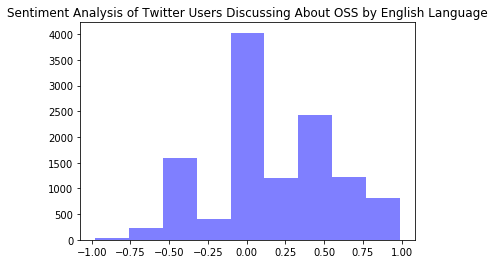

In [26]:
import collections
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import twython

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

#Path to the data you want to analyze
path_sample_sentiment_analysis = "data/en/sample_sentiment_analysis.json"

with open(path_sample_sentiment_analysis) as datafile:
    data = json.load(datafile)
    
for i in range (len(data)):
    data[i] = flatten(data[i])

dataframe = pd.DataFrame(data)

#Path to the csv file you want to create after the data was analyzed
path_to_csv = 'data/en.csv'
dataframe['full_text'].to_csv(path_to_csv)

full_text = pd.read_csv(path_to_csv)
full_text = list(full_text.iloc[:, 1])

sia = SentimentIntensityAnalyzer()

scores =[]

for i in range(len(full_text)):
  scores.append(sia.polarity_scores(full_text[i])['compound'])

num_bins = 9
plt.title('Sentiment Analysis of Twitter Users Discussing About OSS by English Language')
n, bins, patches = plt.hist(scores, num_bins, facecolor='blue', alpha=0.5)
plt.show()

The code does the same than the above codes, except that for this time it generates a histogram graph.

As we can see, most English speakers tend to use a neutral language to talk about OSS on Twitter. But a bigger part of the users use a positive language to talk about it. A smaller, but still representative quantity use negative words.

#### Other languages analysis

I've used the same code as above to generate histograms for Chinese, Spanish and Japanese, which were the languages that I could get more tweets from Twitter. You can check my result below:

![](images/ch.png)![](images/es.png)![](images/ja.png)

Two things might have happened here, either the Chinese, Spanish and Japanese people have neutral opinion about OSS or the data was misread, if the second case is true, this was an expected output since VADER prevents its users that it doesn't deal as good with languages other than English. But the first case is realistic since there were considerable less data from these languages than there were for English, an average of 100 tweets for each one of these languages versus more than 12000 tweets for the English analysis, it's reasonable to assume that most people just talk neutrally about OSS.


## Conclusion

As a conclusion to this project I'm convinced that Twitter is one of the many good sources to measure a community's health online. I felt like I would have stronger and more interesting results if I had access to more datum, but given the conditions I believe that it was a productivity study with regards to mesuare the health of the OSS community to English speakers and to people using the Canadian and American timezones.
The language used to talk about OSS in these timezones and by English speakers is positive in general, which is a good indicative that the community is healthy.